In [1]:
import warnings
warnings.filterwarnings('ignore')

import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from PIL import Image
import cv2
%matplotlib inline

# tweaks for libraries
np.set_printoptions(precision=4, linewidth=1024, suppress=True)
plt.style.use('seaborn')
sns.set_style('darkgrid')
sns.set(context='notebook',font_scale=1.10)

# Pytorch imports
import torch
gpu_available = torch.cuda.is_available()
print('Using Pytorch version %s. GPU %s available' % (torch.__version__, "IS" if gpu_available else "IS **NOT**"))
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset
from torchvision import datasets, transforms
from torch import optim
from torchsummary import summary

# import the Pytorch Toolkit here....
import pytorch_toolkit as pytk

# to ensure that you get consistent results across various machines
# @see: https://discuss.pytorch.org/t/reproducibility-over-different-machines/63047
seed = 42
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.enabled = True

Using Pytorch version 1.7.1+cpu. GPU IS **NOT** available


In [3]:
# download an image
!wget https://www.dropbox.com/s/l98leemr7r5stnm/Hemanvi.jpeg -o ./images/Hemanvi.jpeg 

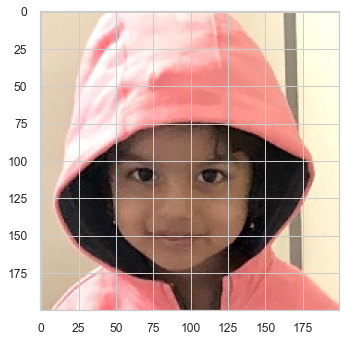

In [20]:
img = cv2.imread('./images/Hemanvi.jpeg')
img2 = img[50:250, 40:240]
# show original image
img_color = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img_color);
plt.show()

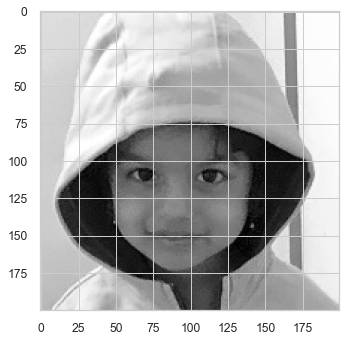

In [19]:
img_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray');
# plt.axis("off")
# plt.grid(False)
plt.show()

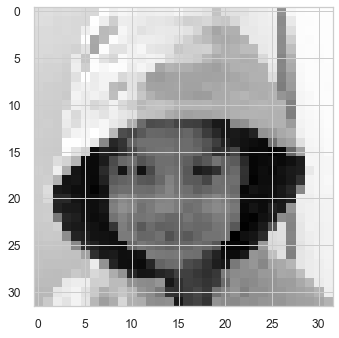

In [18]:
img_gray_small = cv2.resize(img_gray, (32,32))
plt.imshow(img_gray_small, cmap='gray');

In [32]:
data_dir = './data'
# download the training & test Fashion MNIST datasets into ./data folder
xforms = transforms.Compose([transforms.ToTensor(),])
train_dataset = datasets.FashionMNIST(data_dir, download=True, train=True, transform=xforms)
test_dataset = datasets.FashionMNIST(data_dir, download=True, train=False, transform=xforms)
print(f"Downloaded {len(train_dataset)} training records and {len(test_dataset)} testing records")

Downloaded 60000 training records and 10000 testing records


In [33]:
# define our class
from torch.optim import SGD

net = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28*28, 1000),
    nn.ReLU(),
    nn.Linear(1000, 10)
)
model = pytk.PytkModuleWrapper(net)
optimizer = SGD(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()
model.compile(loss=loss_fn, optimizer=optimizer, metrics=['accuracy'])
print(model.summary((1, 28, 28)))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                 [-1, 1000]         785,000
              ReLU-3                 [-1, 1000]               0
            Linear-4                   [-1, 10]          10,010
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 3.03
Estimated Total Size (MB): 3.06
----------------------------------------------------------------
None


In [34]:
hist = model.fit_dataset(train_dataset, validation_split=0.20, epochs=10, batch_size=32)

Training on CPU...
Training on 48000 samples, cross-validating on 12000 samples
Epoch ( 1/10): (48000/48000) -> loss: 1.8163 - accuracy: 0.5633 - val_loss: 1.4168 - val_accuracy: 0.6435 - lr: ['0.00100000']
Epoch ( 2/10): (48000/48000) -> loss: 1.1935 - accuracy: 0.6651 - val_loss: 1.0430 - val_accuracy: 0.6765 - lr: ['0.00100000']
Epoch ( 3/10): (48000/48000) -> loss: 0.9518 - accuracy: 0.6920 - val_loss: 0.8909 - val_accuracy: 0.7115 - lr: ['0.00100000']
Epoch ( 4/10): (48000/48000) -> loss: 0.8394 - accuracy: 0.7247 - val_loss: 0.8090 - val_accuracy: 0.7354 - lr: ['0.00100000']
Epoch ( 5/10): (48000/48000) -> loss: 0.7720 - accuracy: 0.7459 - val_loss: 0.7550 - val_accuracy: 0.7503 - lr: ['0.00100000']
Epoch ( 6/10): (48000/48000) -> loss: 0.7250 - accuracy: 0.7609 - val_loss: 0.7149 - val_accuracy: 0.7642 - lr: ['0.00100000']
Epoch ( 7/10): (48000/48000) -> loss: 0.6890 - accuracy: 0.7736 - val_loss: 0.6833 - val_accuracy: 0.7742 - lr: ['0.00100000']
Epoch ( 8/10): (48000/48000) ->

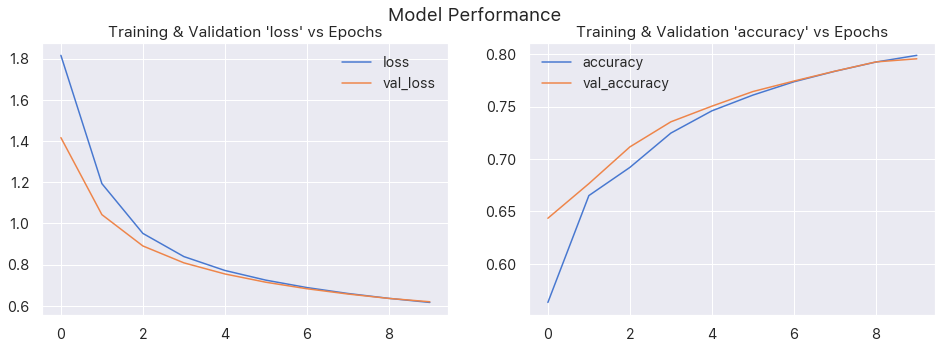

In [36]:
pytk.show_plots(hist, metric='accuracy', plot_title='Model Performance')

In [37]:
del model
model = pytk.PytkModuleWrapper(net)
optimizer = SGD(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()
model.compile(loss=loss_fn, optimizer=optimizer, metrics=['accuracy'])
print(model.summary((1, 28, 28)))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                 [-1, 1000]         785,000
              ReLU-3                 [-1, 1000]               0
            Linear-4                   [-1, 10]          10,010
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 3.03
Estimated Total Size (MB): 3.06
----------------------------------------------------------------
None


In [38]:
hist = model.fit_dataset(train_dataset, validation_split=0.20, epochs=10, batch_size=10000)

Training on CPU...
Training on 48000 samples, cross-validating on 12000 samples
Epoch ( 1/10): (48000/48000) -> loss: 0.6084 - accuracy: 0.7983 - val_loss: 0.6221 - val_accuracy: 0.7951 - lr: ['0.00100000']
Epoch ( 2/10): (48000/48000) -> loss: 0.6079 - accuracy: 0.7989 - val_loss: 0.6217 - val_accuracy: 0.7966 - lr: ['0.00100000']
Epoch ( 3/10): (48000/48000) -> loss: 0.6073 - accuracy: 0.7996 - val_loss: 0.6215 - val_accuracy: 0.7964 - lr: ['0.00100000']
Epoch ( 4/10): (48000/48000) -> loss: 0.6068 - accuracy: 0.8004 - val_loss: 0.6213 - val_accuracy: 0.7958 - lr: ['0.00100000']
Epoch ( 5/10): (48000/48000) -> loss: 0.6072 - accuracy: 0.8003 - val_loss: 0.6211 - val_accuracy: 0.7959 - lr: ['0.00100000']
Epoch ( 6/10): (48000/48000) -> loss: 0.6074 - accuracy: 0.8006 - val_loss: 0.6209 - val_accuracy: 0.7965 - lr: ['0.00100000']
Epoch ( 7/10): (48000/48000) -> loss: 0.6070 - accuracy: 0.8005 - val_loss: 0.6208 - val_accuracy: 0.7967 - lr: ['0.00100000']
Epoch ( 8/10): (48000/48000) ->

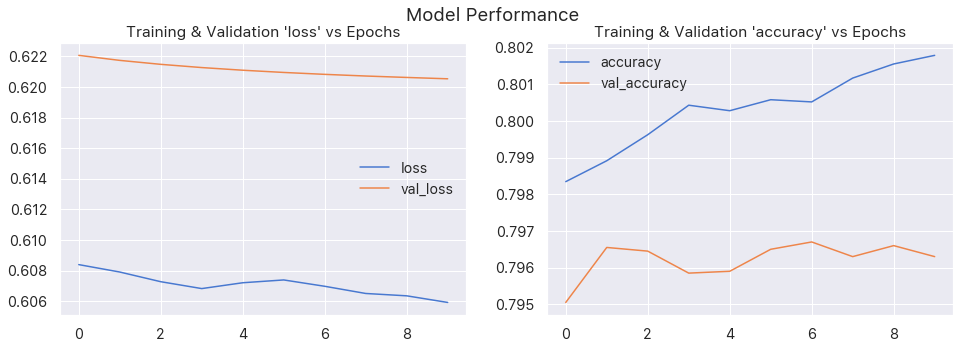

In [39]:
pytk.show_plots(hist, metric='accuracy', plot_title='Model Performance')